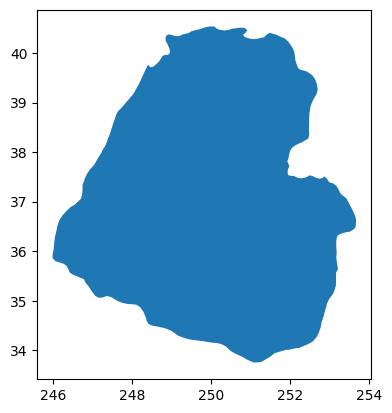

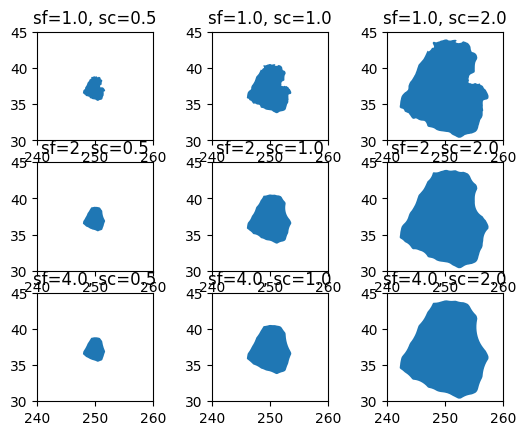

In [3]:
import matplotlib.pyplot as plt
import aglio
from aglio.mapping import PolygonFile

fname = "data/CP_boundary/ColoradoPlateauBoundary.csv"
CP = PolygonFile(fname, lonname="lon", latname="lat")
CP.bounding_polygon
CP.bounding_polygon.plot()
plt.show()


# apply some transformations: smoothing and scaling
fig, axs = plt.subplots(ncols=3, nrows=3)
for irow, sf in enumerate([1.0, 2, 4.0]):
    for icol, sc in enumerate([0.5, 1.0, 2.0]):
        poly_gpd = CP.build_gpd_df(smooth_factor=sf, affine_scale=sc)
        poly_gpd.plot(ax=axs[irow, icol])
        axs[irow, icol].set_xlim([240, 260])
        axs[irow, icol].set_ylim([30, 45])
        axs[irow, icol].set_title(f"sf={sf}, sc={sc}")

plt.show()


### combining with netcdf data

In [12]:
filename = "IRIS/GYPSUM_percent.nc"
ds = aglio.open_dataset(filename)


points within:

In [9]:
d = ds.aglio.filter_surface_gpd(CP.bounding_polygon, drop_null=True)

<Axes: >

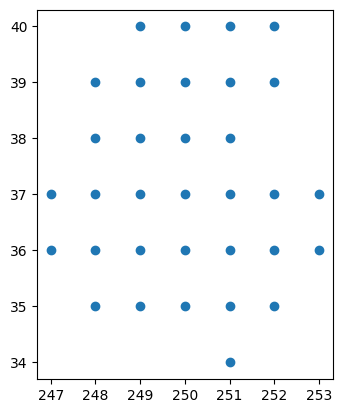

In [10]:
d.plot()

more useful, extract the velocity profiles within a bounding polygon:

In [13]:
P = ds.aglio.get_profiles('dvp', CP.bounding_polygon, drop_null=True)

aglio : [INFO ] 2023-06-28 15:58:59,126:  no data, using supplied lat_y and lon_x.


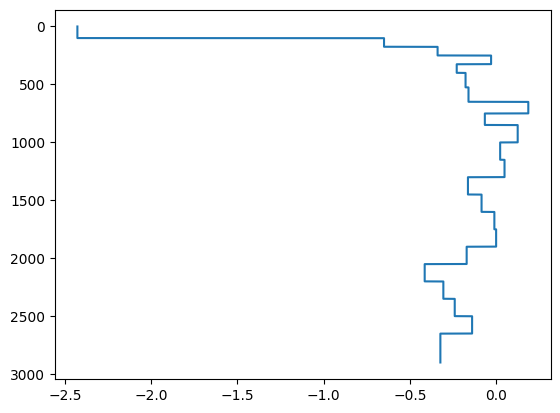

In [17]:
import matplotlib.pyplot as plt 

plt.plot(P.profiles.mean(axis=0), P.depth)
plt.gca().invert_yaxis()